In [2]:
from mlflow.tracking.client import MlflowClient
from mlflow.entities import ViewType
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mlflow
sns.set(color_codes=True)
%matplotlib inline

In [5]:
runs = MlflowClient(tracking_uri="file:/data/logs/kristian/mlruns").search_runs(
  experiment_ids="10",
  filter_string="tags.stage = 'eval'",
)

In [6]:
data = np.zeros((8, 9))

In [9]:
for run in runs:
    qta = run.data.metrics['q_c_test/acc']
    ap = int(run.data.params['quantization/activation_precision'])
    wp = int(run.data.params['quantization/weight_precision'])
    data[ap, wp] = qta



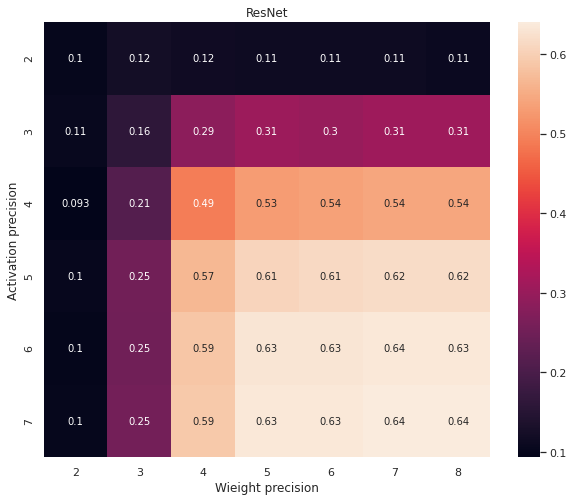

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.heatmap(data[2:,2:], annot=True, xticklabels=[2,3,4,5,6,7,8], yticklabels=[2,3,4,5,6,7])
plt.xlabel("Wieight precision")
plt.ylabel("Activation precision")
plt.title("ResNet")
# plt.show(fig)
plt.savefig('/home/k.schwienbacher/quantization-robustness/data/resnet-heatmap-c.jpg')

In [30]:
mlflow.set_tracking_uri("file:/data/logs/kristian/mlruns")
squeeze_runs = mlflow.search_runs(
  experiment_ids="8",
  filter_string="tags.stage = 'eval'",
  output_format="pandas"
)
squeeze_runs = squeeze_runs[squeeze_runs["params.quantization/weight_precision"] == '8'].set_index("params.quantization/activation_precision")
squeeze_runs['name'] = 'squeezenet'


In [31]:
mlflow.set_tracking_uri("file:/data/logs/kristian/mlruns")
lenet_runs = mlflow.search_runs(
  experiment_ids="7",
  filter_string="tags.stage = 'eval'",
  output_format="pandas"
)
lenet_runs = lenet_runs[lenet_runs["params.quantization/weight_precision"] == '8'].set_index("params.quantization/activation_precision")
lenet_runs['name'] = 'lenet'


In [32]:
mlflow.set_tracking_uri("file:/data/logs/kristian/mlruns")
resnet_runs = mlflow.search_runs(
  experiment_ids="10",
  filter_string="tags.stage = 'eval'",
  output_format="pandas"
)
resnet_runs = resnet_runs[resnet_runs["params.quantization/weight_precision"] == '8'].set_index("params.quantization/activation_precision")
resnet_runs['name'] = 'resnet'

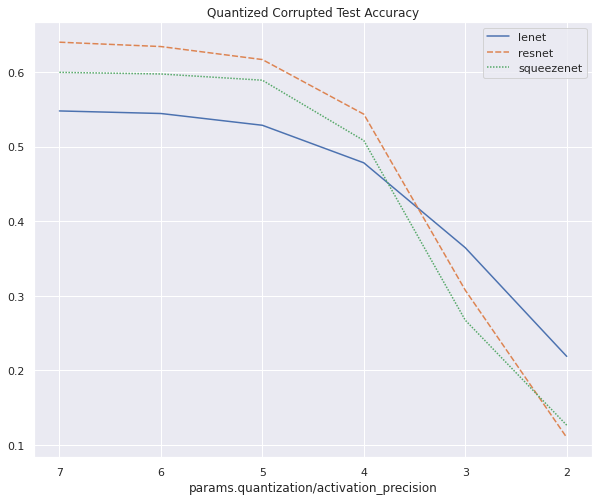

In [33]:
df = pd.DataFrame()
df["lenet"] = lenet_runs["metrics.q_c_test/acc"]
df["resnet"] = resnet_runs["metrics.q_c_test/acc"]
df["squeezenet"] = squeeze_runs["metrics.q_c_test/acc"]
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=df)
plt.title("Quantized Corrupted Test Accuracy")
plt.savefig('/home/k.schwienbacher/quantization-robustness/data/srl-act-c-comparison.jpg')


<AxesSubplot:xlabel='params.quantization/weight_precision'>

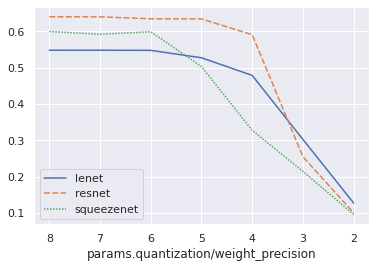

In [301]:
df = pd.DataFrame()
df["lenet"] = lenet_runs["metrics.q_c_test/acc"]
df["resnet"] = resnet_runs["metrics.q_c_test/acc"]
df["squeezenet"] = squeeze_runs["metrics.q_c_test/acc"]
sns.lineplot(data=df)